# ПОС. Домашнее задание 3: визуализации

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('babies_all.csv', index_col=0)
pima = pd.read_csv('pima-indians-diabetes.csv')


C:\Users\dar-s\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
babies.tail()

,name,sex,number,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1. (1 балл)
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет (0.1 балл)


In [4]:
babies.drop_duplicates('year').values
# С 1880 по 2010 

array([['Mary', 'F', 7065, 1880],
       ['Mary', 'F', 6919, 1881],
       ['Mary', 'F', 8149, 1882],
       ['Mary', 'F', 8012, 1883],
       ['Mary', 'F', 9217, 1884],
       ['Mary', 'F', 9128, 1885],
       ['Mary', 'F', 9891, 1886],
       ['Mary', 'F', 9888, 1887],
       ['Mary', 'F', 11754, 1888],
       ['Mary', 'F', 11649, 1889],
       ['Mary', 'F', 12078, 1890],
       ['Mary', 'F', 11704, 1891],
       ['Mary', 'F', 13174, 1892],
       ['Mary', 'F', 12784, 1893],
       ['Mary', 'F', 13151, 1894],
       ['Mary', 'F', 13446, 1895],
       ['Mary', 'F', 13811, 1896],
       ['Mary', 'F', 13412, 1897],
       ['Mary', 'F', 14406, 1898],
       ['Mary', 'F', 13172, 1899],
       ['Mary', 'F', 16710, 1900],
       ['Mary', 'F', 13137, 1901],
       ['Mary', 'F', 14485, 1902],
       ['Mary', 'F', 14275, 1903],
       ['Mary', 'F', 14962, 1904],
       ['Mary', 'F', 16067, 1905],
       ['Mary', 'F', 16371, 1906],
       ['Mary', 'F', 17579, 1907],
       ['Mary', 'F', 18664, 

2) Какое имя в датасете находится по индексом 121? (0.1 балл)

In [5]:
babies.iloc[121]
#Ann

name       Ann
sex          F
number     131
year      1880
Name: 121, dtype: object

3) Cколько всего родилось детей по имени 'Aaron' за все время? (0.2 балла)



In [6]:
babies[babies.name == 'Aaron'].shape
# Всего родилось 212 детей по имени Aaron 

(212, 4)

4) Насколько больше за все время родилось мальчиков чем девочек? (0.2 балла)

In [7]:
babies[babies.sex == 'F'].count() - babies[babies.sex == 'M'].count()
# Деовчек на 317186 больше, чем мальчиков

name      317186
sex       317186
number    317186
year      317186
dtype: int64

5) Cколько мальчиков родилось в 2010? (0.2 балла)

In [8]:
babies[(babies.year == 2010) & (babies.sex == 'M')].shape
# 14140 мальчиков родилось в 2010

(14140, 4)

6) Сколько в датасете девочек по имени John? (0.2 балла)

In [9]:
babies[(babies.sex == 'F') & (babies.name == 'John')].shape
# 131 девочек по имени John

(131, 4)

## Задание 2 (2 балла)

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


(0, 2200000)

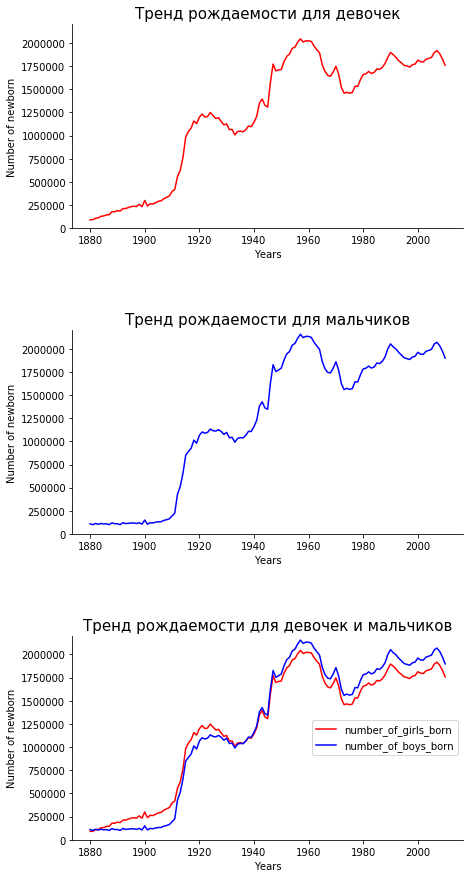

In [18]:
babGirls = pd.DataFrame(babies[babies.sex == 'F'])
babBoys = pd.DataFrame(babies[babies.sex == 'M'])
babGirls.groupby('year')['number'].sum()
babBoys.groupby('year')['number'].sum()
babies_girls = pd.DataFrame({'number_of_girls_born': babGirls.groupby('year')['number'].sum()})
babies_girls['year'] = range(1880, 2011)
babies_boys = pd.DataFrame({'number_of_boys_born': babBoys.groupby('year')['number'].sum()})
babies_boys['year'] = range(1880, 2011)

fig, ax = plt.subplots(3,1, figsize=(7,15))

fig.subplots_adjust(hspace=0.5)

ax[0].plot(babies_girls.year, babies_girls.number_of_girls_born, color = 'red') 
ax[1].plot(babies_boys.year, babies_boys.number_of_boys_born, color = 'blue') 
ax[2].plot(babies_girls.year, babies_girls.number_of_girls_born, color = 'red') 
ax[2].plot(babies_boys.year, babies_boys.number_of_boys_born, color = 'blue') 

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[0].set_title('Tренд рождаемости для девочек', fontsize=15)
ax[1].set_title('Tренд рождаемости для мальчиков', fontsize=15)
ax[2].set_title('Tренд рождаемости для девочек и мальчиков', fontsize=15)

ax[0].set_xlabel('Years')
ax[0].set_ylabel('Number of newborn')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Number of newborn')
ax[2].set_xlabel('Years')
ax[2].set_ylabel('Number of newborn')
ax[2].legend(loc=5, fontsize=10, frameon=True)
ax[0].set_ylim(0,2200000)
ax[1].set_ylim(0,2200000)
ax[2].set_ylim(0,2200000)

Количество новорожденных растет. С 1880 по 2010 год наблюдается несколько резких скачков и падений. Заметный скачки на промежутке от 1915 до 1920 года, а также с 1940 по 1960. Падения менее заметны, однако все равно наблюдаются на промежутке от 1920 до 1940, а также от 1960 до 1975 года. В последнее время наблюдается уменьшение рождаемости. 

## Задание 3 (2.5 балла)

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



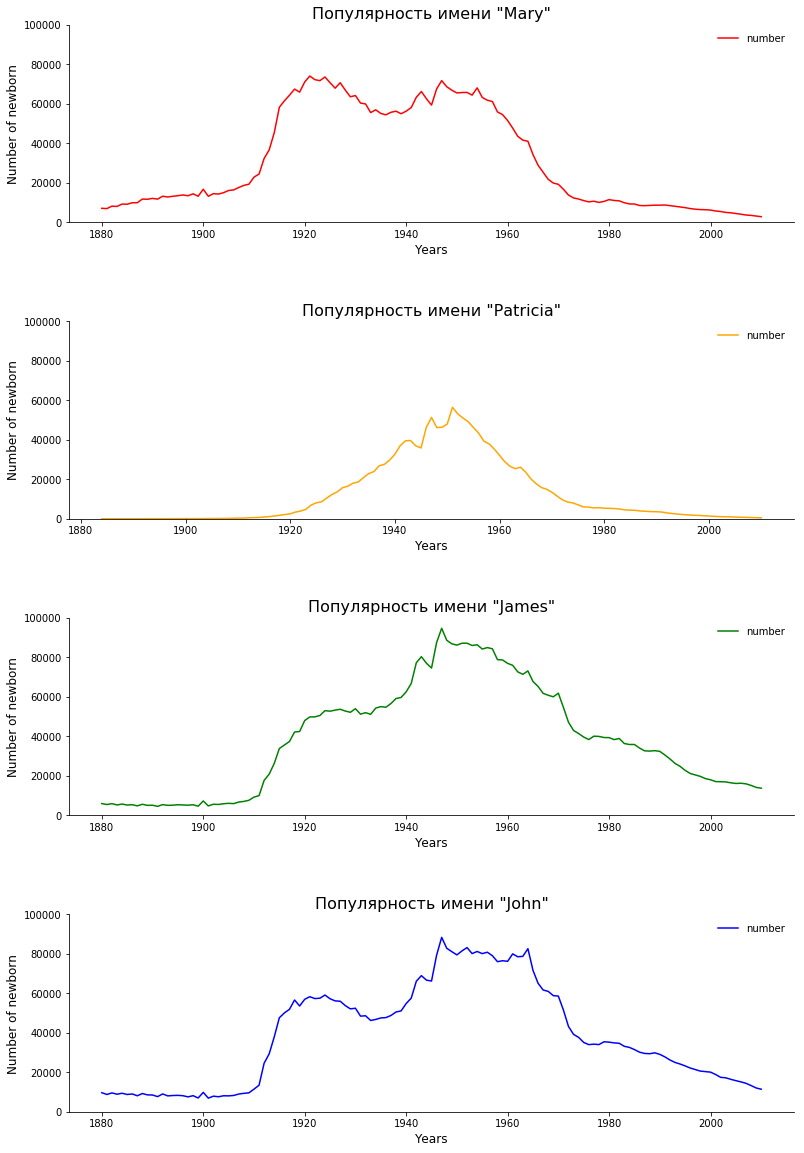

In [17]:
GirlsAlltimesName = pd.DataFrame(babGirls.groupby('name')['number'].sum())
GirlsAlltimesName.sort_values(by=['number'], ascending=False).head(2)
# Самые популярные имена для довочек за все время были Mary и Patricia
BoysAllTimesName = pd.DataFrame(babBoys.groupby('name')['number'].sum())
BoysAllTimesName.sort_values(by=['number'], ascending=False).head(2)
# Самые популярные имена для мальчиков за все время были James и John

babies_mary = pd.DataFrame(babies[(babies.sex == 'F') & (babies.name == 'Mary')])
babies_patricia = pd.DataFrame(babies[(babies.sex == 'F') & (babies.name == 'Patricia')])

babies_james = pd.DataFrame(babies[(babies.sex == 'M') & (babies.name == 'James')])
babies_john = pd.DataFrame(babies[(babies.sex == 'M') & (babies.name == 'John')])

fig, ax = plt.subplots(4,1, figsize=(13,20))

fig.subplots_adjust(hspace=0.5)

ax[0].plot(babies_mary.year, babies_mary.number, color="red")
ax[1].plot(babies_patricia.year, babies_patricia.number, color="orange")
ax[2].plot(babies_james.year, babies_james.number, color="green")
ax[3].plot(babies_john.year, babies_john.number, color="blue")
ax[0].set_title('Популярность имени "Mary"', fontsize = 16)
ax[1].set_title('Популярность имени "Patricia"', fontsize = 16)
ax[2].set_title('Популярность имени "James"', fontsize = 16)
ax[3].set_title('Популярность имени "John"', fontsize = 16)


for x in range(4):
    ax[x].set_xlabel('Years', fontsize = 12)
    ax[x].set_ylabel('Number of newborn', fontsize = 12)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].legend(loc=1, fontsize=10, frameon=False)
    ax[x].set_ylim(0,100000)

На всех графиках наблюдается похожий тренд: имена сначала почти не использовались, потом стали популярны, а ближе 21 веку снова потеряли свою популярность. 

## Задание 4 (2.5 балла)

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

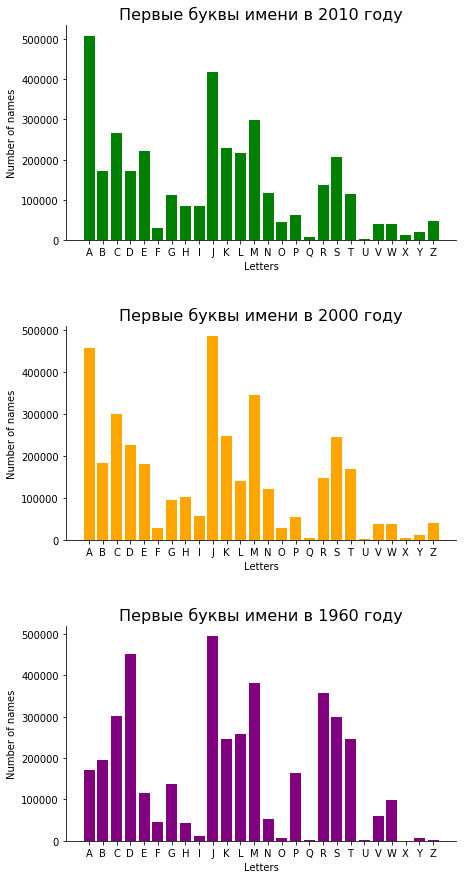

In [16]:
def FL(fullname):
    return(fullname[0])
babies['FirstLetter'] = babies.name.apply(FL)
babies.head()

year2010 = babies[babies.year == 2010]
year2000 = babies[babies.year == 2000]
year1960 = babies[babies.year == 1960]

FLyear2010 = pd.DataFrame({'number': year2010.groupby('FirstLetter')['number'].sum(),
                          'FirstLetter': year2010.groupby('FirstLetter')['FirstLetter'].min()})
FLyear2000 = pd.DataFrame({'number': year2000.groupby('FirstLetter')['number'].sum(),
                          'FirstLetter': year2000.groupby('FirstLetter')['FirstLetter'].min()})
FLyear1960 = pd.DataFrame({'number': year1960.groupby('FirstLetter')['number'].sum(),
                          'FirstLetter': year1960.groupby('FirstLetter')['FirstLetter'].min()})

fig, ax = plt.subplots(3,1, figsize=(7,15))

fig.subplots_adjust(hspace=0.4)

ax[0].bar(FLyear2010.FirstLetter, FLyear2010.number, color='green')
ax[1].bar(FLyear2000.FirstLetter, FLyear2000.number, color='#ffa500')
ax[2].bar(FLyear1960.FirstLetter, FLyear1960.number, color='#800080')
ax[0].set_title('Первые буквы имени в 2010 году', fontsize=16)
ax[1].set_title('Первые буквы имени в 2000 году', fontsize=16)
ax[2].set_title('Первые буквы имени в 1960 году', fontsize=16)
for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('Letters')
    ax[x].set_ylabel('Number of names')

В 2010 году самой популярной первой буквой имени была буква 'A'. 
В 2000 году была буква 'J'.
В 1960 году также была буква 'J'.

## Задание 4 (2 балла)

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


Text(0.5, 1.0, 'Pregnancies-BMI-Class.graph')

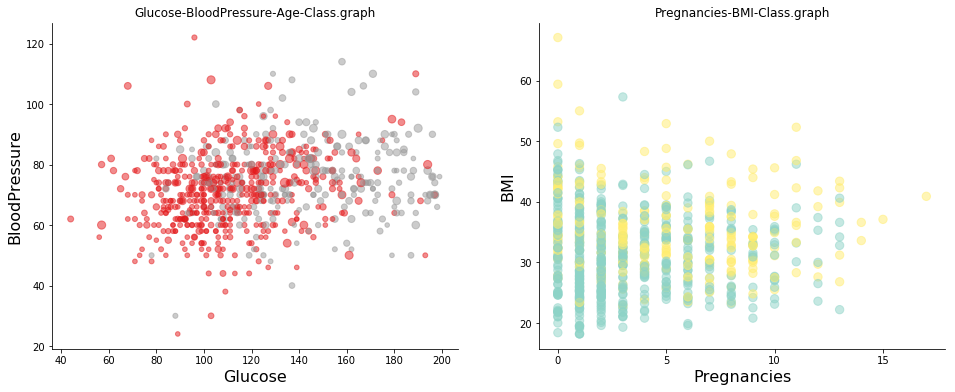

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].scatter(pima['Glucose'], pima['BloodPressure'], s = pima['Age'], alpha = 0.5, c = pima['Class'], cmap = 'Set1') 

ax[1].scatter(pima['Pregnancies'], pima['BMI'], c = pima['Class'], cmap = 'Set3', alpha = 0.5, s = 70)
ax[1].locator_params(integer=True) 

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].set_xlabel('Glucose', fontsize = 16)
ax[1].set_xlabel('Pregnancies', fontsize = 16)
ax[0].set_ylabel('BloodPressure', fontsize = 16)
ax[1].set_ylabel('BMI', fontsize = 16)
ax[0].set_title('Glucose-BloodPressure-Age-Class.graph')
ax[1].set_title('Pregnancies-BMI-Class.graph')

Из первого графика видно, что у людей с диабетом выше уровень глюкозы, немного выше уровень давления. Про возраст сложно что-то сказать, размер точек сильно варьируется. 
Из второго графика видно, что у людей с диабетом индекс массы тела больше, а также количество беременностей у них больше, чем у тех, кто не болен диабетом. 

## Дополнительное задание (1.5 балла)

Задание выполняется на основе материала для самостоятельного изучения и разбора.
"Делаем совмещенные столбчатые диграммы из агрегированных данных" в 
https://github.com/rogovich/2019_POS_Sociology/blob/master/Files/4_Seminar.ipynb

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одни объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

Text(0, 0.5, 'Mean_bmi and Mean_glucose')

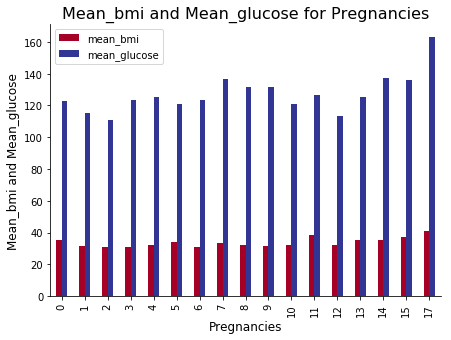

In [20]:
mean_BMI = pima.groupby('Pregnancies')['BMI'].mean()
mean_Glucose = pima.groupby('Pregnancies')['Glucose'].mean()
df = pd.DataFrame()
df['mean_bmi'] = mean_BMI
df['mean_glucose'] = mean_Glucose

fig, ax = plt.subplots(1,1, figsize=(7, 5))
df.plot(kind='bar', ax=ax, cmap = 'RdYlBu')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Mean_bmi and Mean_glucose for Pregnancies', fontsize = 16)
ax.set_xlabel('Pregnancies', fontsize = 12)
ax.set_ylabel('Mean_bmi and Mean_glucose', fontsize = 12)


# сделать вывод задание 5

Заметной зависимости между количеством беременностей и среднем уровнем массы тела не наблюдается. Средний уровень глюкозы выше
у тех, у кого было больше беременностей.